# Figure 2e. Notebook

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import matplotlib
from matplotlib.colors import LogNorm

# Import Custom GTL plotting scheme
from genometechlab_plotting import setup_style
setup_style('inline')

Loaded 7 Helvetica fonts


## Read Data

In [2]:
# Define Filepaths
rna002_m6anet_path = '../Exemplar_Data/modkit/nbt_data_6.3.2_hac.pass.NoU.gencode_v43_sorted_filtered_m6anet_site_genome.aligned.chr2_112157000_114000000.tsv'
rna004_m6anet_path = '../Exemplar_Data/modkit/07_27_23_RNA004_GM12878_polyA_RNA_sup_8mods_polyA.gencode_v43_sorted_filtered_m6anet_site_genome.aligned.chr2_112157000_114000000.tsv'

# Read in files and rename headers
def load_df(path, m6anet = False):
    if not m6anet:
        df = pd.read_csv(path, sep = '\t', header = None)
        df.rename(
            columns={
                0: 'Chromosome',
                1: 'Start',
                2: 'End',
                3: 'Call',
                4: 'Score',
                5: 'Strand',
                6: 'Start_1',
                7: 'End_1',
                8: 'RBG',
                9: 'N_valid_cov',
                10: 'Mod_Percent',
                11: 'N_mod',
                12: 'N_canon',
                13: 'N_other_mod',
                14: 'N_delete',
                15: 'N_fail',
                16: 'N_diff',
                17: 'N_no_call',
                18: 'Adjusted_Mod_Proportion'
            },
            inplace = True
        )
    else:
        df = pd.read_csv(path, sep = '\t')

    return df

rna002_m6anet = load_df(rna002_m6anet_path, m6anet = True)
rna004_m6anet = load_df(rna004_m6anet_path, m6anet = True)


## Merge dataframes

In [3]:
# Merge datasets
rna002_rna004 = rna002_m6anet.merge(rna004_m6anet, how='inner', left_on=['chrom', 'end', 'strand', 'base'], 
                                right_on=['chrom', 'end', 'strand', 'base'], 
                                suffixes=['_rna002', '_rna004']).reset_index(drop=True)


## Create 2D Histogram Plot

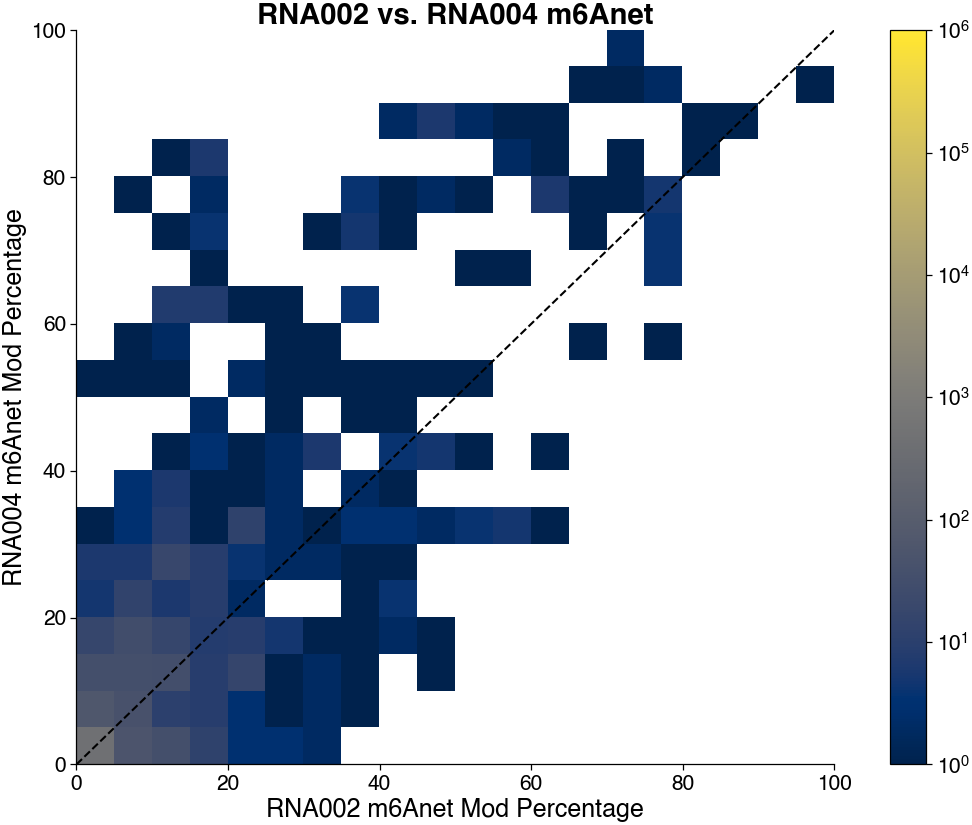

In [4]:
%matplotlib inline

# Extract columns for plotting
rna002 = rna002_rna004['mod_percent_rna002']
rna004 = rna002_rna004['mod_percent_rna004']

# Set up the histogram bins
bandwidth_2d = 5
bins = np.arange(0, 100 + bandwidth_2d, bandwidth_2d)

# Create the 2D histogram
hist, xedges, yedges = np.histogram2d(rna002, rna004, bins=bins)

# Plot the heatmap
im = plt.imshow(hist.T,
                norm=LogNorm(vmin=1, vmax=10**6),  # Standardized normalization range
                origin='lower',
                extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                aspect='auto',
                cmap='cividis',
                interpolation='nearest')
cbar = plt.colorbar(im, ticks=np.logspace(0, 6, 7))
cbar.set_ticklabels(['$10^0$', '$10^1$', '$10^2$', '$10^3$', '$10^4$', '$10^5$', '$10^6$'])

plt.title('RNA002 vs. RNA004 m6Anet')
plt.xlabel('RNA002 m6Anet Mod Percentage')
plt.ylabel('RNA004 m6Anet Mod Percentage')

# Add y = x line
min_val = min(xedges[0], yedges[0])
max_val = max(xedges[-1], yedges[-1])
plt.plot([min_val, max_val], [min_val, max_val], color='k', linestyle='--')
plt.show()
